In [77]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
# %matplotlib inline

In [85]:
def fit_predict_model(dataframe,
                      interval_width = 0.9,
                      changepoint_range = 0.8,
                      changepoint_prior_scale=0.05,
                      daily_seasonality=False,
                      yearly_seasonality=False,
                      weekly_seasonality=False
                     ):
    m = Prophet(daily_seasonality = daily_seasonality, yearly_seasonality = yearly_seasonality, weekly_seasonality = weekly_seasonality,
                seasonality_mode = 'additive',
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast, m

In [79]:
def plt_scatter(data_X, y_true, y_pred=None, name="实际MA", fname=None, save=False):
    colors = ["blue", "#e6550d"]
    # color = [colors[0] if i==1 else colors[1] for i in y_true]
    fig = plt.figure(figsize=(6,8), tight_layout=True)
    set_size(fig, w_mul=0.6)
    # 获取正常样本的索引
    normal_index = [i for i, x in enumerate(y_true) if x == 1]
    abnormal_index = [i for i in range(len(y_true)) if i not in normal_index]

    f1 = plt.scatter(data_X.iloc[normal_index]["攻角"], data_X.iloc[normal_index][name], c=colors[0], s=1)
    f2 = plt.scatter(data_X.iloc[abnormal_index]["攻角"], data_X.iloc[abnormal_index][name], c=colors[1], s=1)
    plt.grid(linestyle="-.", linewidth=0.4)
    if y_pred is not None:
        pred_abnormal_index = [i for i, x in enumerate(list(y_pred.ravel())) if x == -1] #预测的异常样本的索引
        f3 = plt.scatter(data_X.iloc[pred_abnormal_index]["攻角"], data_X.iloc[pred_abnormal_index][name], c=colors[2], marker="^")
        plt.legend([f1, f2, f3], ["normal", "abnormal", "pred_abnormal"], fontsize=4)
    else:
        plt.legend([f1, f2], ["Normal", "Abnormal"], fontsize=4)
    plt.xticks(np.arange(-4, 12, 2), fontsize=4)
    # plt.xticklabels(np.arange(-4,12,2), fontdict={"fontsize": 4})
    plt.xlabel("Angle of attack", fontdict={"fontsize":4})
    if name == "实际MA":
        name = "Actual Mach number"
    else:
        name = "Actual roate speed"
    y_min = np.min(data["实际MA"]) - 0.001
    y_max = np.max(data["实际MA"]) + 0.001
    plt.ylim(y_min, y_max)
    plt.yticks(np.arange(0.897, 0.922+0.006, 0.006), fontsize=4)
    plt.ylabel(name, fontdict={"fontsize":4})
    save_fig_name = fname[:-4] + "_" + name + ".png"
    if save:
        plt.savefig("./figures/" + save_fig_name)
    plt.show()

In [80]:
abnormal_filenames = ["5_0.1.csv", "6_0.2.csv", "7_0.2.csv", "8_0.2.csv", "9_0.1.csv", "10_0.2.csv"]
data = pd.read_csv("./data/origin/" + abnormal_filenames[1], encoding="gbk")
cols = data.columns
cols

Index(['攻角', 'MA', '实际MA', '实际转速', '角速度', 'label'], dtype='object')

# student T检验

In [81]:
data_ = data[["攻角","实际MA","label"]]
mu = np.mean(data_["实际MA"])
sigma = np.std(data_["实际MA"])
# data_["t_score"] = (data["实际MA"]-mu) / sigma
from scipy import stats
interval = stats.t.interval(0.95,len(data_)-1,mu,sigma)
index = np.logical_and((data_["实际MA"]>=interval[0]).values,(data_["实际MA"]<=interval[1]))
data_ = data_.ix[index]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



# prophrt预测

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\anaconda\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,fact
0,2019-10-01 00:00:00,0.699783,0.699783,0.699783,0.699105,0.700614,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.0,0.0,0.0,0.699832,0.70012
1,2019-10-01 01:00:00,0.700025,0.700025,0.700025,0.699310,0.700716,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.0,0.0,0.0,0.700060,0.70020
2,2019-10-01 02:00:00,0.700267,0.700267,0.700267,0.699526,0.700972,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,-0.000019,0.0,0.0,0.0,0.700248,0.70014
3,2019-10-01 03:00:00,0.700509,0.700509,0.700509,0.699677,0.701162,-0.000089,-0.000089,-0.000089,-0.000089,-0.000089,-0.000089,0.0,0.0,0.0,0.700421,0.70015
4,2019-10-01 04:00:00,0.700751,0.700751,0.700751,0.699918,0.701393,-0.000136,-0.000136,-0.000136,-0.000136,-0.000136,-0.000136,0.0,0.0,0.0,0.700615,0.70028
5,2019-10-01 05:00:00,0.700993,0.700993,0.700993,0.700138,0.701565,-0.000152,-0.000152,-0.000152,-0.000152,-0.000152,-0.000152,0.0,0.0,0.0,0.700841,0.70056
6,2019-10-01 06:00:00,0.701256,0.701256,0.701256,0.700353,0.701825,-0.000165,-0.000165,-0.000165,-0.000165,-0.000165,-0.000165,0.0,0.0,0.0,0.701091,0.70107
7,2019-10-01 07:00:00,0.701519,0.701519,0.701519,0.700590,0.702053,-0.000207,-0.000207,-0.000207,-0.000207,-0.000207,-0.000207,0.0,0.0,0.0,0.701312,0.70148
8,2019-10-01 08:00:00,0.701782,0.701782,0.701782,0.700746,0.702233,-0.000263,-0.000263,-0.000263,-0.000263,-0.000263,-0.000263,0.0,0.0,0.0,0.701519,0.70177
9,2019-10-01 09:00:00,0.702045,0.702045,0.702045,0.701101,0.702511,-0.000273,-0.000273,-0.000273,-0.000273,-0.000273,-0.000273,0.0,0.0,0.0,0.701772,0.70200


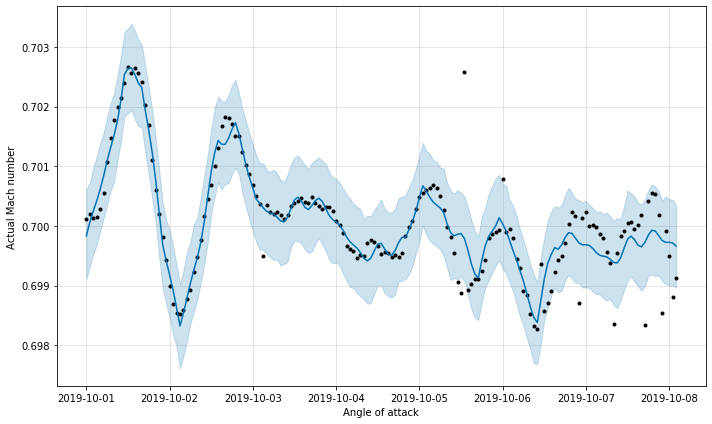

In [100]:
data1 = data_[["实际MA"]]
data1["ds"] = pd.date_range(start="2019-10-1", periods=data1.values.shape[0], freq="H")
data1.rename(columns={"实际MA":"y"}, inplace=True)
forecast, model = fit_predict_model(data1,
                                    interval_width = 0.93,
                                    changepoint_range = 0.8,
                                    changepoint_prior_scale=0.1,
                                    daily_seasonality=True
                                   )
model.plot(forecast, xlabel='Angle of attack', ylabel='Actual Mach number')
forecast